# Figures

Prepared for "Restaurants and Covid 19" presentation for the UW Now series on March 2, 2021. 

Kim J. Ruhl 

files needed = ('short_inds.csv', 'covid-table1-q1-naics.csv', 'covid-table19-q7-naics.csv')

These figures use data from the [Business Response Survey to the Coronavirus Pandemic](https://www.bls.gov/brs/data/tables/) from the BLS. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This file contains the shortened industry names.
short = pd.read_csv('short_inds.csv')

These functions take care of loading the data files and formatting the figures.

In [3]:
def load_table_naics(name):
    df = pd.read_csv(name)
    df = pd.merge(left=df, right=short, on='NAICS')
    df.set_index('NAICS', inplace=True)
    df['color'] = 'firebrick'
    df.loc['72', 'color'] = 'silver'
    
    return df

In [4]:
def create_bar():
    fig, ax = plt.subplots(figsize=(16,10))
    
    ax.tick_params(axis='both', labelsize=18 )
    sns.despine()
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', length=0)
    ax.grid(axis='x', color='white')
    ax.tick_params(axis='both', labelsize=18 )
    
    return (fig, ax)

## Table 1 figures

In [5]:
df = load_table_naics('covid-csv-data-files/covid-table1-q1-naics.csv')
df.head(2)

,Industry,Q1_r5_p,Q1_r5_p_se,Q1_r5_estab,Q1_r5_estab_se,Q1_r5_pemp,Q1_r5_pemp_se,Q1_r5_emp,Q1_r5_emp_se,Q1_r6_p,...,Q1_r12_p,Q1_r12_p_se,Q1_r12_estab,Q1_r12_estab_se,Q1_r12_pemp,Q1_r12_pemp_se,Q1_r12_emp,Q1_r12_emp_se,Industry_short,color
NAICS,,,,,,,,,,,,,,,,,,,,,
11,"Agriculture, Forestry, Fishing and Hunting",30.21,4.38,31612.0,4583.0,44.11,3.96,564213.0,50639.0,48.14,...,27.99,4.48,29284.0,4688.0,20.39,4.10,260820.0,52418.0,Agriculture,firebrick
21,"Mining, Quarrying, and Oil and Gas Extraction",11.39,1.37,3483.0,417.0,16.10,3.90,108749.0,26368.0,70.03,...,21.63,2.95,6614.0,902.0,18.16,3.98,122624.0,26857.0,Mining,firebrick


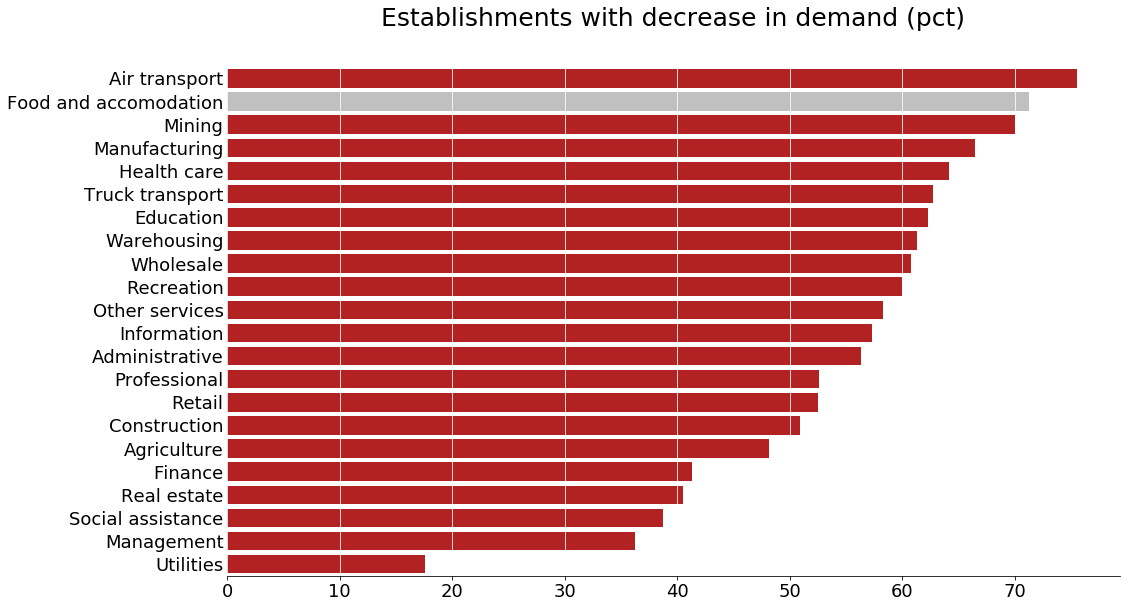

In [6]:
fig, ax = create_bar()

ax.barh(df.sort_values('Q1_r6_p').Industry_short, df['Q1_r6_p'].sort_values(), color=df.sort_values('Q1_r6_p').color)
ax.set_ylim(-0.5,23)

ax.set_title('Establishments with decrease in demand (pct)', fontsize=25)
plt.savefig('low_demand.svg', bbox_inches='tight')

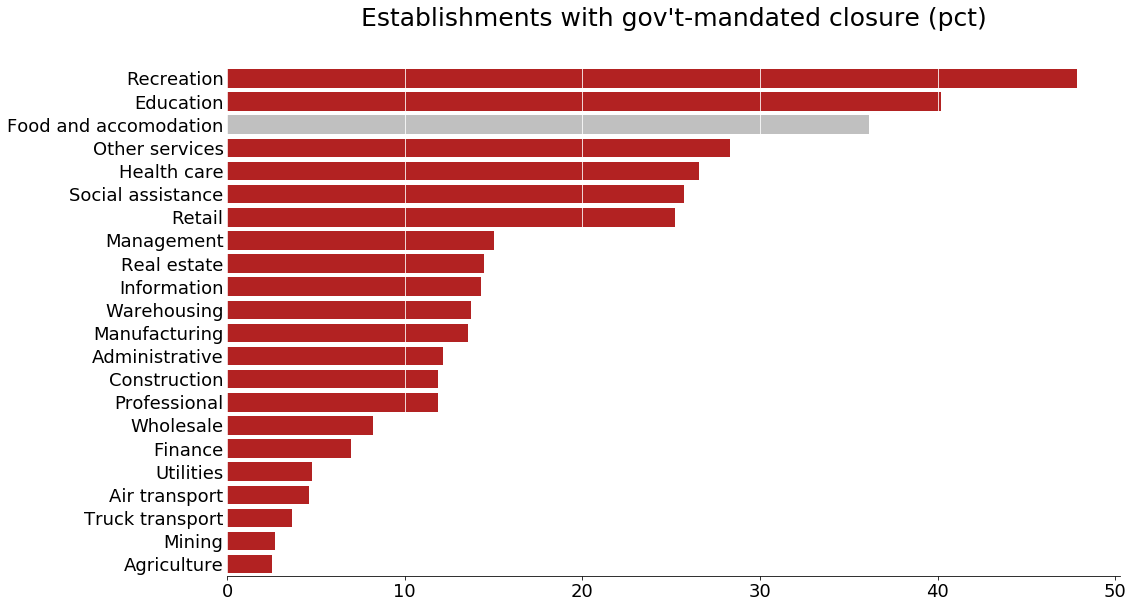

In [21]:
fig, ax = create_bar()

ax.barh(df.sort_values('Q1_r9_p').Industry_short, df['Q1_r9_p'].sort_values(), color=df.sort_values('Q1_r9_p').color)
ax.set_ylim(-0.5,23)

ax.set_title('Establishments with gov\'t-mandated closure (pct)', fontsize=25)
plt.savefig('govt_close.svg', bbox_inches='tight')

## Table 19 figures

In [7]:
df19 =  load_table_naics('covid-csv-data-files/covid-table19-q7-naics.csv')
df19.head(2)

,Industry,Q7_r1_p,Q7_r1_p_se,Q7_r1_estab,Q7_r1_estab_se,Q7_r1_pemp,Q7_r1_pemp_se,Q7_r1_emp,Q7_r1_emp_se,Industry_short,color
NAICS,,,,,,,,,,,
11,"Agriculture, Forestry, Fishing and Hunting",53.96,4.56,56468.0,4767.0,59.53,5.00,761457.0,64015.0,Agriculture,firebrick
21,"Mining, Quarrying, and Oil and Gas Extraction",56.54,4.05,17286.0,1237.0,45.62,5.54,308119.0,37423.0,Mining,firebrick


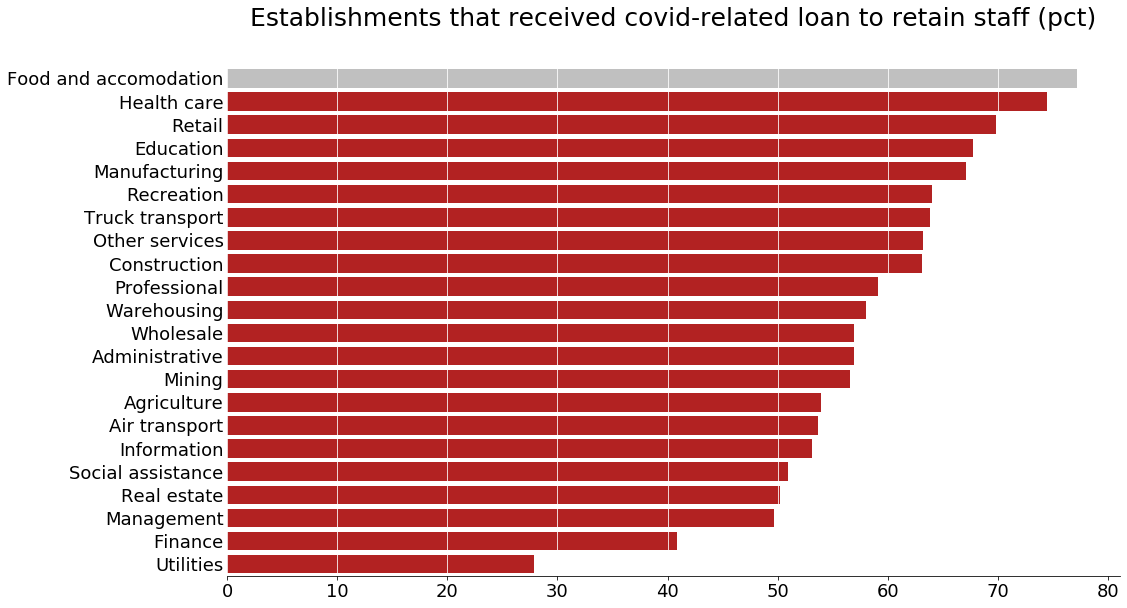

In [8]:
fig, ax = create_bar()

ax.barh(df19.sort_values('Q7_r1_p').Industry_short, df19['Q7_r1_p'].sort_values(), color=df19.sort_values('Q7_r1_p').color)
ax.set_ylim(-0.5,23)
ax.set_title('Establishments that received covid-related loan to retain staff (pct)', fontsize=25)

plt.savefig('ppp_share.svg', bbox_inches='tight')